In [1]:
# Importing Word2Vec model
from gensim.models import KeyedVectors
# Importing the "tarfile" module 
import tarfile
# Importing pandas to import data file into python
import pandas as pd
# Importing matplotlib to be able to create plots
import matplotlib.pyplot as plt
# Importing seaborn to be able to create more advanced plots
import seaborn as sns
# Importing numpy for mathematical equations
import numpy as np
# Importing scipy to be able to create models
import scipy.io as scipy
# Importing statsmodels library for OLS multiple regression analysis
import statsmodels.api as sm

In [2]:
# Importing the word repository model into the keyedfactors library
model = KeyedVectors.load_word2vec_format('./combined320/320/combined-320.txt')

In [3]:
#Uploading the Data
# Read the CSV file
vft_data = pd.read_csv('thesisdata_edited.csv', sep= ';')

# Keeping the columns needed: age_beh, CRIQ_total_v2, CF_animals, CF_professions
vft_data_clean = vft_data[['age_beh', 'CRIQ_total_v2', 'CF_animals', 'CF_professions']]

# Creating age dummies
vft_data_clean['age_dummy'] = np.where((vft_data_clean['age_beh']<35), 0, 1)

<ipython-input-3-4c70a9a71d0e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vft_data_clean['age_dummy'] = np.where((vft_data_clean['age_beh']<35), 0, 1)


In [4]:
# Creating an array of the data
vft_data_array = np.array(vft_data_clean) # Creating a numpy array from the data
vft_data_list = vft_data_array.tolist() # Convert the numpy array to a list (it is easier to work with a list than an array)

# Making a list of verbal fluency results and removing all words that are not in the Word2Vec model
for i in range(0,len(vft_data_list)): # Loop through all test participants
    vft_data_list[i][2] = vft_data_list[i][2].lower().split(", ") # Make a list from the animal fluency responses
    vft_data_list[i][3] = vft_data_list[i][3].lower().split(", ") # Make a list from the profession fluency responses
    vft_data_list[i][2] = [x for x in vft_data_list[i][2] if x in model] # Delete all animals that are not in the Word2Vec model
    vft_data_list[i][3] = [x for x in vft_data_list[i][3] if x in model] # Delete all professions that are not in the Word2Vec model

# Calculating Average word SND

In [5]:
SND_complete = [] # Creating empty list to store both average animal and average profession SND of each participant

# Getting all SND of animals of all participants
for k in range(0, len(vft_data_list)):
    SND_participant = [] # Creating empty list to hold average animal and profession SND of one participant
    
    # Calculating Animal SND     
    SND_list_animal = [] # Creating empty list with undefined length
    for i in range(0, len(vft_data_list[k][2])): # Loop from 0 to the amount of animals said by participant
        if vft_data_list[k][2][i] in model: # Checking if word is in the Word2Vec model
            similar_list = model.most_similar(vft_data_list[k][2][i]) # Creating a list of the top 10 similarity words including string and number
            similar_value_list = [] # Creating empty list with undefined length for the similarity values of top 10 

            for j in range(0, len(similar_list)): # Loop from 0 to amount of neighbors, top 10  
                similarity = float(similar_list[j][1]) # Only take similarity and make it a float value
                similar_value_list.append(similarity) # Append the similarity to the list    

            SND = sum(similar_value_list)/(len(similar_value_list)) # Sum the similarity values and divide with amount of neighbors, top 10
            SND_list_animal.append(SND) # Append the average similarity of top 10 of word said in test to list

    average_animal_SND = sum(SND_list_animal)/len(SND_list_animal) # Calculating average animal SND
    SND_participant.append(average_animal_SND) # Appending average SND to participant list
    
    # Calculating Profession SND
    SND_list_profession = [] # Creating empty list with undefined length
    for i in range(0, len(vft_data_list[k][3])): # Loop from 0 to the amount of professions said by participant
        if vft_data_list[k][3][i] in model: # Checking if word is in the Word2Vec model
            similar_list = model.most_similar(vft_data_list[k][3][i]) # Creating a list of the top 10 similarity words including string and number
            similar_value_list = [] # Creating empty list with undefined length for the similarity values of top 10 

            for j in range(0, len(similar_list)): # Loop from 0 to amount of neighbors, top 10  
                similarity = float(similar_list[j][1]) # Only take similarity and make it a float value
                similar_value_list.append(similarity) # Append the similarity to the list    

            SND = sum(similar_value_list)/(len(similar_value_list)) # Sum the similarity values and divide with amount of neighbors, top 10
            SND_list_profession.append(SND) # Append the average similarity of top 10 of word said in test to list
    
    average_profession_SND = sum(SND_list_profession)/len(SND_list_profession) # Calculating average profession SND
    SND_participant.append(average_profession_SND) # Appending average SND to participant list
    
    SND_complete.append(SND_participant) # Adding SND lists of one participant to the complete list

In [6]:
# Adding columns of SND values to the dataframe
vft_data_clean['SND_average_animal'] = np.array([item[0] for item in SND_complete])
vft_data_clean['SND_average_profession'] = np.array([item[1] for item in SND_complete])

<ipython-input-6-39fab3e65f73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vft_data_clean['SND_average_animal'] = np.array([item[0] for item in SND_complete])
<ipython-input-6-39fab3e65f73>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vft_data_clean['SND_average_profession'] = np.array([item[1] for item in SND_complete])


# Cognitive Reserve and Average SND

In [7]:
# Running the multiple regression model with cognitive reserve and average SND

# Animal multiple regression
X = vft_data_clean[['CRIQ_total_v2', 'age_dummy']]
y = vft_data_clean['SND_average_animal']

x = sm.add_constant(X) # adding a constant
 
regression_model = sm.OLS(y, x).fit()
predictions = regression_model.predict(x) 
 
print_model = regression_model.summary()
print(print_model)

# Profession multiple regression
X = vft_data_clean[['CRIQ_total_v2', 'age_dummy']]
y = vft_data_clean['SND_average_profession']

x = sm.add_constant(X) # adding a constant
 
regression_model = sm.OLS(y, x).fit()
predictions = regression_model.predict(x) 
 
print_model = regression_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     SND_average_animal   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.035
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.365
Time:                        11:22:26   Log-Likelihood:                 115.50
No. Observations:                  41   AIC:                            -225.0
Df Residuals:                      38   BIC:                            -219.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.6257      0.014     46.104

# Total amount of words and SND

In [8]:
# Getting total words for every participant
animal_total_words = []
profession_total_words = []
for i in range(0,len(vft_data_list)):
    animal_total_words.append(len(vft_data_list[i][2]))
    profession_total_words.append(len(vft_data_list[i][3]))

In [9]:
# Adding columns of total words to the dataframe
vft_data_clean['total_animal'] = np.array(animal_total_words)
vft_data_clean['total_profession'] = np.array(profession_total_words)

<ipython-input-9-c78727e8a539>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vft_data_clean['total_animal'] = np.array(animal_total_words)
<ipython-input-9-c78727e8a539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vft_data_clean['total_profession'] = np.array(profession_total_words)


In [10]:
# Running the multiple regression model with total amount of words and average SND

# Animal multiple regression
X = vft_data_clean[['total_animal', 'age_dummy']]
y = vft_data_clean['SND_average_animal']

x = sm.add_constant(X) # adding a constant
 
regression_model = sm.OLS(y, x).fit()
predictions = regression_model.predict(x) 
 
print_model = regression_model.summary()
print(print_model)

# Profession multiple regression
X = vft_data_clean[['total_profession', 'age_dummy']]
y = vft_data_clean['SND_average_profession']

x = sm.add_constant(X) # adding a constant
 
regression_model = sm.OLS(y, x).fit()
predictions = regression_model.predict(x) 
 
print_model = regression_model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:     SND_average_animal   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.8087
Date:                Tue, 19 Dec 2023   Prob (F-statistic):              0.453
Time:                        11:22:35   Log-Likelihood:                 115.27
No. Observations:                  41   AIC:                            -224.5
Df Residuals:                      38   BIC:                            -219.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6590      0.014     45.763   

# Graphs

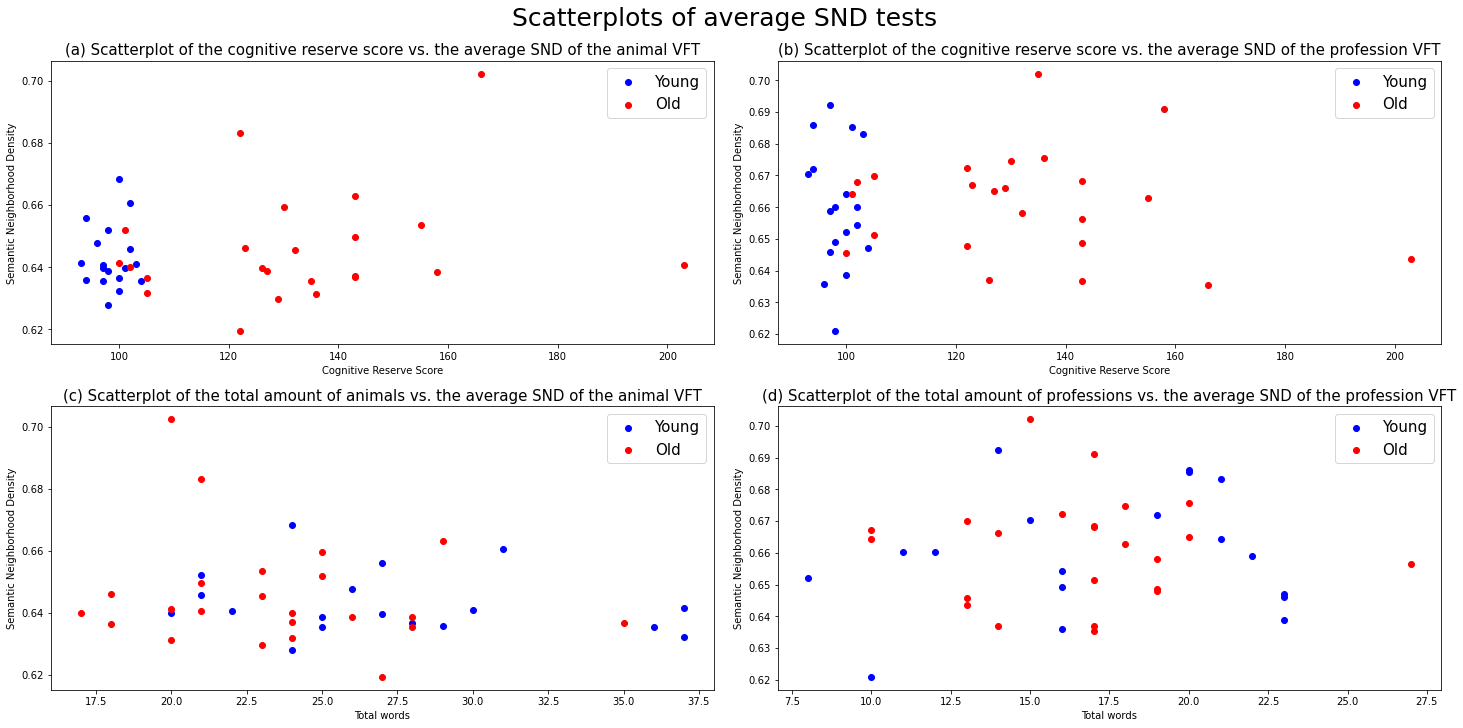

In [11]:
fig, ax = plt.subplots(2,2, figsize=(20, 10), constrained_layout = True)
fig.suptitle("Scatterplots of average SND tests", size=25)
#Average SND
ax[0,0].scatter(vft_data_clean['CRIQ_total_v2'].loc[vft_data_clean['age_dummy']==0], vft_data_clean['SND_average_animal'].loc[vft_data_clean['age_dummy']==0], marker="o", color="b", label="Young")
ax[0,0].scatter(vft_data_clean['CRIQ_total_v2'].loc[vft_data_clean['age_dummy']==1], vft_data_clean['SND_average_animal'].loc[vft_data_clean['age_dummy']==1], marker="o", color="r", label="Old")
ax[0,0].set_xlabel("Cognitive Reserve Score")
ax[0,0].set_ylabel("Semantic Neighborhood Density")
ax[0,0].set_title("(a) Scatterplot of the cognitive reserve score vs. the average SND of the animal VFT", size=15)
ax[0,0].legend(loc="upper right", fontsize=15)

ax[0,1].scatter(vft_data_clean['CRIQ_total_v2'].loc[vft_data_clean['age_dummy']==0], vft_data_clean['SND_average_profession'].loc[vft_data_clean['age_dummy']==0], marker="o", color="b", label="Young")
ax[0,1].scatter(vft_data_clean['CRIQ_total_v2'].loc[vft_data_clean['age_dummy']==1], vft_data_clean['SND_average_profession'].loc[vft_data_clean['age_dummy']==1], marker="o", color="r", label="Old")
ax[0,1].set_xlabel("Cognitive Reserve Score")
ax[0,1].set_ylabel("Semantic Neighborhood Density")
ax[0,1].set_title("(b) Scatterplot of the cognitive reserve score vs. the average SND of the profession VFT", size=15)
ax[0,1].legend(loc="upper right", fontsize=15)

#Total words
ax[1,0].scatter(vft_data_clean['total_animal'].loc[vft_data_clean['age_dummy']==0], vft_data_clean['SND_average_animal'].loc[vft_data_clean['age_dummy']==0], marker="o", color="b", label="Young")
ax[1,0].scatter(vft_data_clean['total_animal'].loc[vft_data_clean['age_dummy']==1], vft_data_clean['SND_average_animal'].loc[vft_data_clean['age_dummy']==1], marker="o", color="r", label="Old")
ax[1,0].set_xlabel("Total words")
ax[1,0].set_ylabel("Semantic Neighborhood Density")
ax[1,0].set_title("(c) Scatterplot of the total amount of animals vs. the average SND of the animal VFT", size=15)
ax[1,0].legend(loc="upper right", fontsize=15)

ax[1,1].scatter(vft_data_clean['total_profession'].loc[vft_data_clean['age_dummy']==0], vft_data_clean['SND_average_profession'].loc[vft_data_clean['age_dummy']==0], marker="o", color="b", label="Young")
ax[1,1].scatter(vft_data_clean['total_profession'].loc[vft_data_clean['age_dummy']==1], vft_data_clean['SND_average_profession'].loc[vft_data_clean['age_dummy']==1], marker="o", color="r", label="Old")
ax[1,1].set_xlabel("Total words")
ax[1,1].set_ylabel("Semantic Neighborhood Density")
ax[1,1].set_title("(d) Scatterplot of the total amount of professions vs. the average SND of the profession VFT", size=15)
ax[1,1].legend(loc="upper right", fontsize=15)

#plt.savefig("scatterplots.svg")

Text(0.5, 1.0, '(c) Q-Q plot of the average SND of profession VFT')

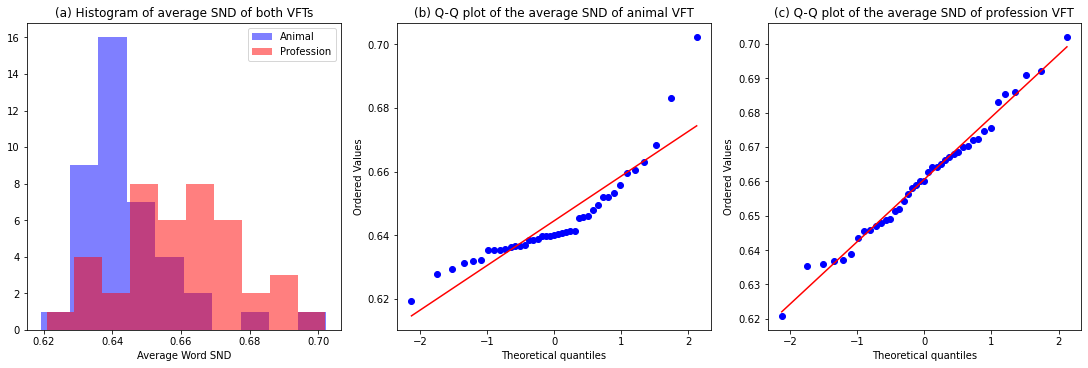

In [12]:
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy import stats

fig, ax = plt.subplots(1,3, figsize=(15, 5), constrained_layout = True)
ax[0].hist(vft_data_clean['SND_average_animal'], alpha=0.5, color = 'b', label='Animal')
ax[0].hist(vft_data_clean['SND_average_profession'], alpha=0.5, color = 'r', label='Profession')
ax[0].set_title("(a) Histogram of average SND of both VFTs")
ax[0].set_xlabel("Average Word SND")
ax[0].legend()

stats.probplot(vft_data_clean['SND_average_animal'], plot=ax[1])
ax[1].set_title("(b) Q-Q plot of the average SND of animal VFT")
stats.probplot(vft_data_clean['SND_average_profession'], plot=ax[2])
ax[2].set_title("(c) Q-Q plot of the average SND of profession VFT")

#plt.savefig("normality.svg")